# Fordgobike Trip Data 

## Invastigating Overview
These data related to some bike trips, so we want to know who spend more time in trip and does your age affect the ride also who is more subscribers or customers?
These are some of the questions we will answer using visualz and charts.

## Dataset Overview

The data consisted of trips of approximately 183412 trips. They were taking during february-2019. the data has some records like the birth year, gender, start and end time, and duration of the trip  

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import datetime

%matplotlib inline

import warnings
warnings.simplefilter("ignore")

In [2]:
# Reading the clean data extracted from the explatory analysis
trips = pd.read_csv('201902-fordgobike-tripdata_clean.csv')
trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Unnamed: 0               183412 non-null  int64  
 1   duration_sec             183412 non-null  int64  
 2   start_time               183412 non-null  object 
 3   end_time                 183412 non-null  object 
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_name         183215 non-null  object 
 8   end_station_latitude     183412 non-null  float64
 9   end_station_longitude    183412 non-null  float64
 10  bike_id                  183412 non-null  int64  
 11  user_type                183412 non-null  object 
 12  member_birth_year        183412 non-null  int64  
 13  member_gender            183412 non-null  object 
 14  bike

### Now, the first question will be who is the more customers or subscribers?


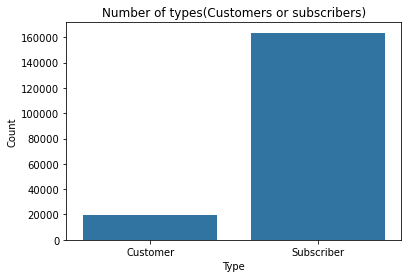

In [3]:
# here bar plot is strong one to see the count between the two types
base_color = sb.color_palette()[0]
sb.countplot(data=trips, x='user_type', color=base_color)
plt.xlabel('Type')
plt.ylabel('Count');
plt.title('Number of types(Customers or subscribers)');

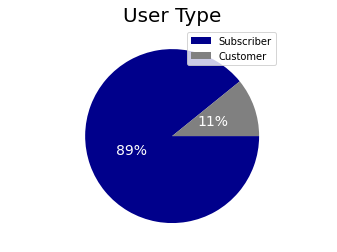

In [4]:
# Since we have only two catagories we also can use pie chart as plot

sorted_counts = trips['user_type'].value_counts()
colors = ( "darkblue",
           "gray")
plt.pie(sorted_counts, labels = sorted_counts.index, textprops={'fontsize': 14,'color':"w"},counterclock =False, autopct="%.0f%%",pctdistance=0.5,colors = colors)
plt.legend(sorted_counts.index, loc="best")
plt.title("User Type", fontsize=20);

### We can see from the histogram that the subscribers is way more than the customers and its percentage about nine times the other.
###  We can assume that themost people need bikes for everyday use like sports or to go to work so they subscribe.

### The second question we can ask is between the two types mentioned before who spends more in trips?

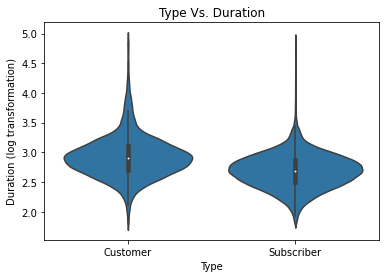

In [5]:
# As the user type and duration are qualitative and quantitative values then a violin plot may be used
# Doing log trans. as duration numbers are large 

def log_trans(x, inverse = False):
    if not inverse:
        return np.log10(x)
    else:
        return np.power(10, x)
trips['duration_sec_log'] = trips['duration_sec'].apply(log_trans)
sb.violinplot(data = trips, x = 'user_type', y = 'duration_sec_log',innner=None,color = base_color)
plt.xlabel('Type')
plt.title('Type Vs. Duration')
plt.ylabel('Duration (log transformation)');

### We can see that the customer may spend more in a trip. perhaps the customer need the bike one time for a long trip but the subscriber may needed for sport or to go to work near his house so the trip is short.

### Third question we can ask is which gender rides the most?

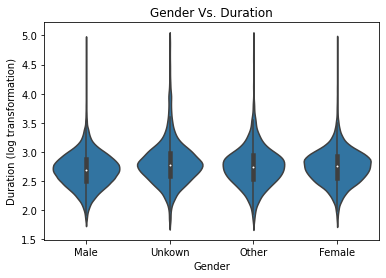

In [6]:

sb.violinplot(data = trips, x = 'member_gender', y = 'duration_sec_log',innner=None,color = base_color)
plt.xlabel('Gender')
plt.title('Gender Vs. Duration')
plt.ylabel('Duration (log transformation)');

### We can see that the four curves seem to be normally distributed
- It seems like the ones who refused to declare their gender(Unknown) sometimes tend to spend more time in trips but the average of the trip is some how between 500 and 1000 seconds

### The final question is related to age, Which age do you think ride the most?

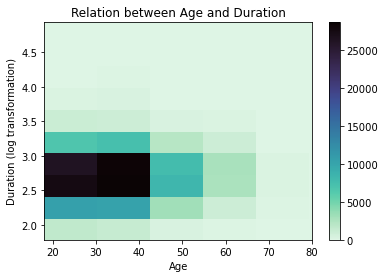

In [7]:

trips['age'] = 2019 - trips['member_birth_year']
plt.hist2d(data = trips, x = 'age', y = 'duration_sec_log', cmap='mako_r')
plt.colorbar()
plt.xlabel('Age')
plt.xlim(right=80)
plt.title('Relation between Age and Duration')
plt.ylabel('Duration (log transformation)');

### We can see that the most duarations fall between the ages of 20 and 40 maybe becauese they are healthier

### Conclusion : After drawing some visuals we reached to these insights,
- The numbers of subscribers is much higher than the number of customers may be related for the everyday use of people so subscribtion is easier.
- All genders have approxmatily the average number of duration.
- Younger people ride more than older people maybe because they healthier.
- Subscribers have shorter trip duration than customers.

#### Must be put in mind that these insghts were based only on the data provided and data analysis techniques applied on the data. 